# MATH60629A
# Week \#6 (Part II) - Convolutional Neural Networks - Exercises

Author: *Behrouz Babaki*

# Image Filtering

Recall that we introduced filters as matrices which are applied to different regions of an image using a dot-product operation. As an example, consider the tiny 3x3 image below:

<img src="images/tiny.svg" width="150" />

This is a grayscale image, which means that each pixel can be represented by a number between 0 and 255:

<img src="images/grid1.svg" width="150" />


## Applying a filter

Let's see the effect of applying the *moving average* filter to this image. A moving average filter of size $k$ is a $k \times k$ matrix where all entries are $1/k^2$. For example for $k=2$, the filter would be:

<img src="images/filter1.svg" width="100" />

As you remember from the course, in order to apply a filter, we *move* it across the image and each time calculate the dot product between the filter and the corresponding region of the image. In this animation, the 4x4 image is in lighter blue, the 3x3 filter (k=3) is applied to the darker blue region, and the 2x2 result is the green part on top):

<p>
<figure>
    <img src="images/slide_nostride_nopadding.gif" width="250"/>
    <figcaption style="text-align:center;font: italic small sans-serif"> image source: <a href="http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html#no-zero-padding-unit-strides">Theano documentation</a> </figcaption>
</figure>
<br>
</p>

Applying the filter to the lower left corner of the image leads to calculating the dot product $(20, 213, 60, 83)\cdot(0.25, 0.25, 0.25, 0.25) = 94$:

<img src="images/apply1.svg" width="450"/>


### Exercise
Fill in values of the remaining three cells in the filtered image.  



## Applying filters to real images

We will now apply two types of filter to an image, and see how they affect the image. We begin by loading and plotting the original image:

--2022-10-10 22:03:05--  https://raw.githubusercontent.com/lcharlin/80-629/master/week6-RNNs%2BCNNs/images/Charlie_Chaplin.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1071227 (1.0M) [image/jpeg]
Saving to: ‘Charlie_Chaplin.jpg.1’

Charlie_Chaplin.jpg 100%[===================>]   1.02M  2.94MB/s    in 0.3s    

2022-10-10 22:03:06 (2.94 MB/s) - ‘Charlie_Chaplin.jpg.1’ saved [1071227/1071227]



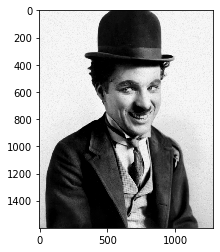

In [1]:
import matplotlib
from matplotlib import pyplot as plt

!wget https://raw.githubusercontent.com/lcharlin/80-629/master/week6-RNNs%2BCNNs/images/Charlie_Chaplin.jpg
image = matplotlib.image.imread('Charlie_Chaplin.jpg').astype('int')
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

### Moving average
We first apply the *moving average* filter:

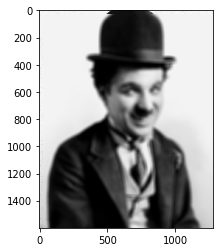

In [2]:
img_blurred = image.copy()
n_rows, n_cols = image.shape

k = 30
for r in range(k, n_rows):
    for c in range(k, n_cols):
        img_blurred[r, c] = image[r-k:r,c-k:c].sum() / (k**2)
        
plt.imshow(img_blurred, cmap='gray', vmin=0, vmax=255)

### Exercise
1. What is the effect of applying the *moving average* filter?
2. Change the value of $k$ to 10 and run the code again. What is the effect of this value? 
3. What does the following line in the code do?  `img_blurred[r, c] = img[r-k:r,c-k:c].sum() / (k**2)`

### Edge detection
As mentioned in the lectures, the *edge detection* filter has the form $(-1, 1)$ or $(1, -1)$. The code below applies these filters to the image:

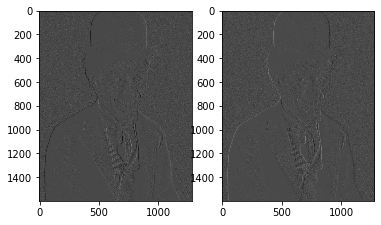

In [3]:
image_edges_1 = image.copy()
image_edges_2 = image.copy()
n_rows, n_cols = image.shape
for r in range(1, n_rows):
    for c in range(1, n_cols):
        image_edges_1[r,c] = image[r,c] - image[r,c-1]
        image_edges_2[r,c] = -image[r,c] + image[r,c-1]
        
plt.subplot(1, 2, 1)
plt.imshow(image_edges_1, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(image_edges_2, cmap='gray')

# Convolutional Neural Networks

The core building block of convolutional neural networks is the convolutional layer, which consists of a set of learnable filters. In previous parts of this document we saw how filters are applied to an image. In practice, by changing certain hyper-parameters, the filters can be applied differently. One of these hyper-parameters is *stride*. 

## Stride

The hyper-parameter *stride* controls the way that the filter slides on an image. When the stride is 1, the filter is moved one pixel at a time. When it's 2, the filter jumps 2 pixels in each move: 

<p>
<figure>
    <img src="images/slide_stride2_nopadding.gif" width="250"/>
    <figcaption style="text-align:center;font: italic small sans-serif"> image source: <a href="http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html#no-zero-padding-non-unit-strides">Theano documentation</a> </figcaption>
</figure>
<br>
</p>


## MAX-Pooling layer

Recall that the max-pooling layer reduces the size of the image by taking the max of values in the region that it covers. The pooling layers can also be applied with a stride. 

<img src="images/maxpooling.svg" width="550"/>


## Exercise

In this exercise, you will manually apply the operations of the convolution layer and pooling layer on two images. The diagram below shows the order of those operations:

<img src="images/exercise.svg" width="650"/>

The kernels (filters) are 3x3 matrices: 
```
kernel1 = [[0, 0, 0], 
           [1, 1, 1], 
           [0, 0, 0]]

kernel2 = [[1, 0, 0], 
           [0, 1, 0], 
           [0, 0, 1]]
```

<img src="images/kernels.svg" width="250"/>

The input images are:
```
image1 = [[0, 0, 0, 0, 0],
          [1, 1, 1, 1, 1],
          [0, 0, 0, 0, 0],
          [1, 1, 1, 1, 1],
          [0, 0, 0, 0, 0]]

image2 = [[1, 0, 0, 1, 0],
          [0, 1, 0, 0, 1],
          [0, 0, 1, 0, 0],
          [1, 0, 0, 1, 0],
          [0, 1, 0, 0, 1]]
```

<img src="images/input_images.svg" width="350"/>

1. For each input image, calculate the outputs of the convolution layer and the max-pooling layers. Note the strides in the convolution layer. 
2. How these two kernels differentiate between different images?
3. If this pipeline is a part of a convolutional neural network, how many learned parameters are there?
4. This pipeline is different from a convolutional neural network, i.e. it misses a few components. What are teh missing components? 
